In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [300]:
cashrequest_df =pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees_df  =pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [302]:
import pandas as pd

# Paso 1: Crear la columna 'account_status' en cashrequest_df
cashrequest_df['account_status'] = cashrequest_df['user_id'].apply(
    lambda x: 'active' if pd.notna(x) else 'inactive'
)

# Verificar que la columna 'account_status' ha sido creada correctamente
print(cashrequest_df[['user_id', 'account_status']].head())

# Paso 2: Realizar la fusión entre 'cashrequest_df' y 'fees_df' usando 'id' y 'cash_request_id'
merged_df = pd.merge(cashrequest_df, fees_df, left_on='id', right_on='cash_request_id', how='left')

# Paso 3: Verificar si la columna 'account_status' está presente en merged_df
print(merged_df[['user_id', 'account_status', 'cash_request_id']].head())


   user_id account_status
0    804.0         active
1    231.0         active
2    191.0         active
3    761.0         active
4   7686.0         active
   user_id account_status  cash_request_id
0    804.0         active              NaN
1    231.0         active              NaN
2    191.0         active              NaN
3    761.0         active              NaN
4   7686.0         active              NaN


In [304]:
# Verificar el estado de algunas filas
print(merged_df[['user_id', 'deleted_account_id', 'account_status']].head())



   user_id  deleted_account_id account_status
0    804.0                 NaN         active
1    231.0                 NaN         active
2    191.0                 NaN         active
3    761.0                 NaN         active
4   7686.0                 NaN         active


In [306]:
active_users_df = merged_df[merged_df['account_status'] == 'active']
inactive_users_df = merged_df[merged_df['account_status'] == 'inactive']


In [308]:
print(merged_df.columns)  # Ver las columnas del merged_df
print(merged_df.head())    # Ver las primeras filas para asegurarnos de que los datos son correctos


Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment'],
      dtype='object')
   id_x  amount  status_x                   created_at_x  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                    updated_at_x  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    80

In [310]:
# Verificar valores nulos en las columnas clave
print(merged_df[['user_id', 'account_status', 'amount', 'cash_request_id']].isnull().sum())


user_id             2572
account_status         0
amount                 0
cash_request_id    11037
dtype: int64


In [312]:
total_amount_active = active_users_df['amount'].sum()
total_amount_inactive = inactive_users_df['amount'].sum()

print(f"Total amount requested by active users: {total_amount_active}")
print(f"Total amount requested by inactive users: {total_amount_inactive}")


Total amount requested by active users: 2464647.0
Total amount requested by inactive users: 215732.0


In [314]:
# Número de solicitudes por usuario
requests_per_user = merged_df.groupby('user_id').size().reset_index(name='num_requests')

# Total de dinero solicitado por usuario
total_per_user = merged_df.groupby('user_id')['amount'].sum().reset_index(name='total_requested')

# Unir estos resultados al merged_df
merged_df = merged_df.merge(requests_per_user, on='user_id', how='left')
merged_df = merged_df.merge(total_per_user, on='user_id', how='left')

print(merged_df.head())


   id_x  amount  status_x                   created_at_x  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                    updated_at_x  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [316]:
# Eliminamos filas con valores nulos en las columnas clave
merged_df = merged_df.dropna(subset=['amount', 'account_status'])

# Verificamos los nulos restantes
print(merged_df.isnull().sum())


id_x                              0
amount                            0
status_x                          0
created_at_x                      0
updated_at_x                      0
user_id                        2572
moderated_at                  10335
deleted_account_id            29521
reimbursement_date                0
cash_request_received_date     7945
money_back_date                8177
transfer_type                     0
send_at                        9416
recovery_status               24894
reco_creation                 24894
reco_last_update              24894
account_status                    0
id_y                          11037
cash_request_id               11037
type                          11037
status_y                      11037
category                      29898
total_amount                  11037
reason                        11037
created_at_y                  11037
updated_at_y                  11037
paid_at                       16563
from_date                   

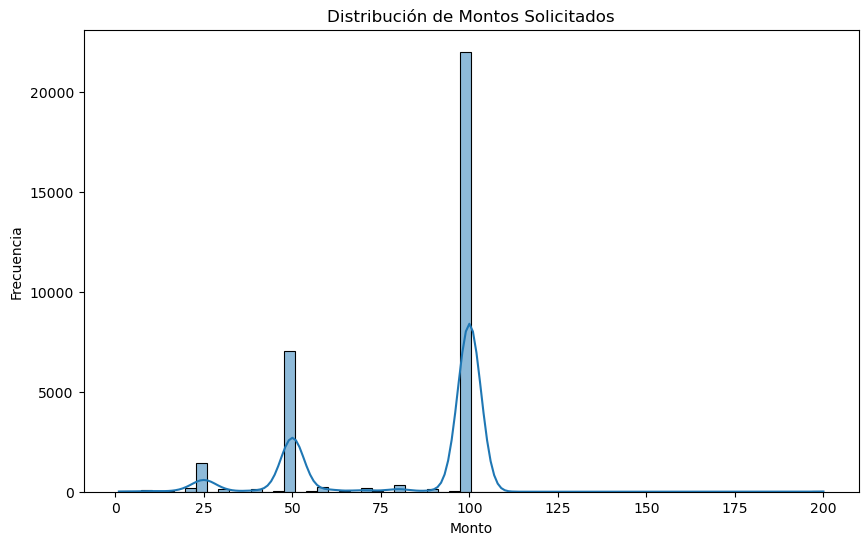

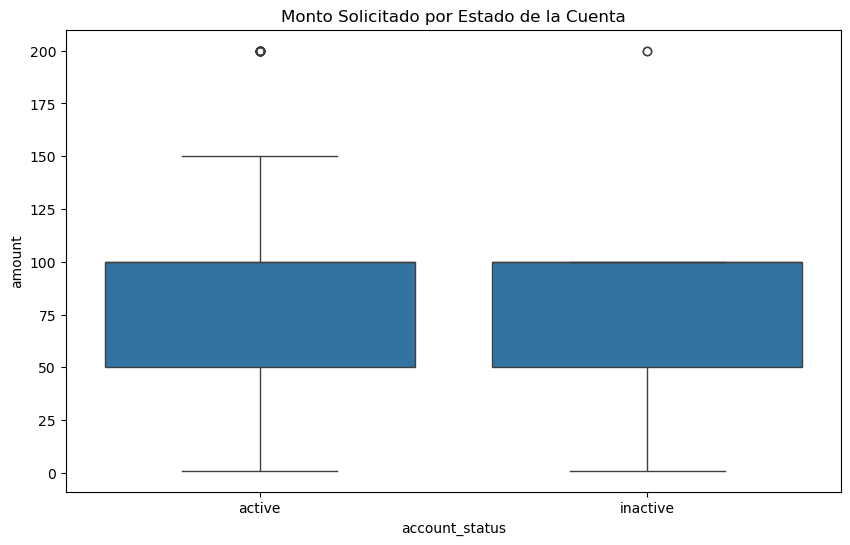

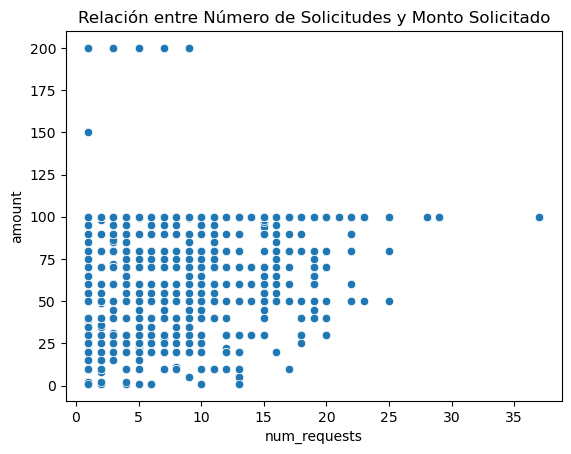

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de los montos solicitados
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['amount'], kde=True)
plt.title('Distribución de Montos Solicitados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de amount por account_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='account_status', y='amount', data=merged_df)
plt.title('Monto Solicitado por Estado de la Cuenta')
plt.show()

# Correlación entre cantidad solicitada y número de solicitudes por usuario
sns.scatterplot(x='num_requests', y='amount', data=merged_df)
plt.title('Relación entre Número de Solicitudes y Monto Solicitado')
plt.show()


In [320]:
# Contar la cantidad de cuentas activas e inactivas
account_status_counts = merged_df['account_status'].value_counts()

# Mostrar el resultado
print(account_status_counts)


account_status
active      29522
inactive     2572
Name: count, dtype: int64


In [322]:
# Promedio de montos solicitados por cuentas activas e inactivas
average_amount_by_status = merged_df.groupby('account_status')['amount'].mean()

# Mostrar el resultado
print(average_amount_by_status)


account_status
active      83.485096
inactive    83.877138
Name: amount, dtype: float64


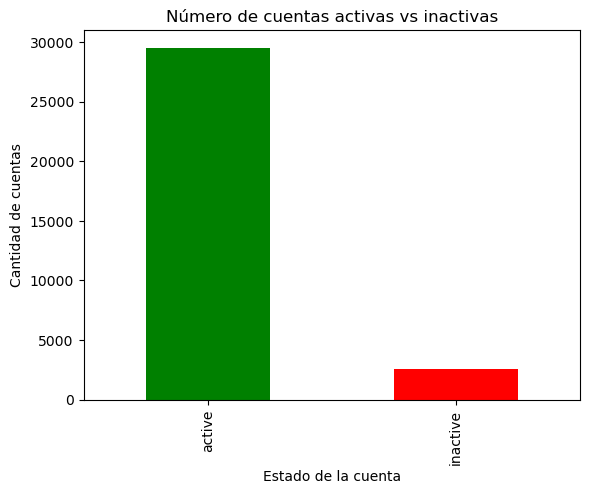

In [324]:
import matplotlib.pyplot as plt

# Gráfico de barras de cuentas activas vs. inactivas
account_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Número de cuentas activas vs inactivas')
plt.xlabel('Estado de la cuenta')
plt.ylabel('Cantidad de cuentas')
plt.show()


In [346]:
# Filtramos las cuentas activas e inactivas basándonos en user_id (activo) y deleted_account_id (inactivo)
active_df = merged_df[merged_df['user_id'].notnull()]
inactive_df = merged_df[merged_df['deleted_account_id'].notnull()]

# Verificamos si hay datos nulos
print(f'Cuentas activas: {active_df.shape[0]} registros')
print(f'Cuentas inactivas: {inactive_df.shape[0]} registros')

# Verificamos las columnas que tenemos
print(active_df.columns)
print(inactive_df.columns)


Cuentas activas: 29522 registros
Cuentas inactivas: 2573 registros
Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment', 'num_requests',
       'total_requested'],
      dtype='object')
Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',


In [350]:
active_df

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,num_requests,total_requested
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.0
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1000.0
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,200.0
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,99.0
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after,2.0,200.0
32090,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before,2.0,200.0
32091,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after,2.0,200.0
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before,3.0,300.0


In [328]:
# Revisar los tipos de datos de las columnas en active_df y inactive_df
print(active_df.dtypes)
print(inactive_df.dtypes)

# Filtrar solo las columnas numéricas
numerical_columns_active = active_df.select_dtypes(include=['number']).columns
numerical_columns_inactive = inactive_df.select_dtypes(include=['number']).columns

# Ver las columnas numéricas
print(f'Columnas numéricas en active_df: {numerical_columns_active}')
print(f'Columnas numéricas en inactive_df: {numerical_columns_inactive}')


id_x                            int64
amount                        float64
status_x                       object
created_at_x                   object
updated_at_x                   object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
account_status                 object
id_y                          float64
cash_request_id               float64
type                           object
status_y                       object
category                       object
total_amount                  float64
reason                         object
created_at_y                   object
updated_at_y                   object
paid_at     

In [330]:
# Imputar valores nulos solo en las columnas numéricas
active_df[numerical_columns_active] = active_df[numerical_columns_active].fillna(active_df[numerical_columns_active].mean())
inactive_df[numerical_columns_inactive] = inactive_df[numerical_columns_inactive].fillna(inactive_df[numerical_columns_inactive].mean())


C:\Users\chris\AppData\Local\Temp\ipykernel_34836\3219694605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df[numerical_columns_active] = active_df[numerical_columns_active].fillna(active_df[numerical_columns_active].mean())
C:\Users\chris\AppData\Local\Temp\ipykernel_34836\3219694605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df[numerical_columns_inactive] = inactive_df[numerical_columns_inactive].fillna(inactive_df[numerical_columns_inactive].mean())


In [332]:
# Verificar que ya no haya valores nulos en las columnas numéricas
print(f'Valores nulos en cuentas activas después de imputar: \n{active_df[numerical_columns_active].isnull().sum()}')
print(f'Valores nulos en cuentas inactivas después de imputar: \n{inactive_df[numerical_columns_inactive].isnull().sum()}')


Valores nulos en cuentas activas después de imputar: 
id_x                  0
amount                0
user_id               0
deleted_account_id    0
id_y                  0
cash_request_id       0
total_amount          0
num_requests          0
total_requested       0
dtype: int64
Valores nulos en cuentas inactivas después de imputar: 
id_x                  0
amount                0
user_id               0
deleted_account_id    0
id_y                  0
cash_request_id       0
total_amount          0
num_requests          0
total_requested       0
dtype: int64


In [364]:
# Calcular cuántas solicitudes de efectivo ha hecho cada usuario activo
active_df['cash_request_count'] = active_df.groupby('user_id')['cash_request_id'].transform('count')
inactive_df['cash_request_count'] = inactive_df.groupby('user_id')['cash_request_id'].transform('count')
# Comprobamos los resultados
print(active_df[['user_id', 'amount', 'cash_request_count']].drop_duplicates().head())


   user_id  amount  cash_request_count
0    804.0   100.0                   0
1    231.0   100.0                   3
2    191.0   100.0                   0
3    761.0    99.0                   0
4   7686.0   100.0                   0


C:\Users\chris\AppData\Local\Temp\ipykernel_34836\3184902850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['cash_request_count'] = active_df.groupby('user_id')['cash_request_id'].transform('count')
C:\Users\chris\AppData\Local\Temp\ipykernel_34836\3184902850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df.groupby('user_id')['cash_request_id'].transform('count')


In [366]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 2. Separar características y etiquetas para el modelo
X = active_df[['cash_request_count']]
y = active_df['amount']

# 3. Crear el modelo de regresión lineal
model = LinearRegression()

# 4. Entrenamiento del modelo
model.fit(X, y)

# 5. Predecir valores para cuentas inactivas
# Asegurarnos de que total_amount esté presente y correctamente configurado
inactive_grouped = inactive_df.copy()

# Agregar columna total_amount con ceros si no está presente
if 'total_amount' not in inactive_grouped.columns:
    inactive_grouped['total_amount'] = 0  # Valores de relleno

# Mantener el orden de las columnas igual que en el entrenamiento
inactive_grouped = inactive_grouped[['cash_request_count', 'total_amount']]

# Realizar la predicción
inactive_grouped['predicted_total_amount'] = model.predict(inactive_grouped[['cash_request_count']])

# 6. Mostrar los resultados
print(inactive_grouped[['cash_request_count', 'predicted_total_amount']])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [336]:
# Selección de características para el modelo (ejemplo: columnas numéricas relevantes)
X_active = active_df[['total_amount', 'cash_request_count']]  # Características predictoras
y_active = active_df['cash_request_count']  # Variable objetivo (número de peticiones)

# Verificación rápida
print(f'Características seleccionadas:\n{X_active.head()}')
print(f'Variable objetivo:\n{y_active.head()}')


Características seleccionadas:
   total_amount  cash_request_count
0           5.0                   1
1           5.0                  10
2           5.0                   2
3           5.0                   1
4           5.0                   1
Variable objetivo:
0     1
1    10
2     2
3     1
4     1
Name: cash_request_count, dtype: int64


In [282]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selección de características y variable objetivo
X_active = active_df[['total_amount', 'cash_request_count']]
y_active = active_df['cash_request_count']  # Usaremos el número de solicitudes como objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_active, y_active, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
r2_score = model.score(X_test, y_test)
print(f'Puntaje R^2 en el conjunto de prueba: {r2_score:.2f}')


Puntaje R^2 en el conjunto de prueba: 1.00


In [338]:
# Calcular cash_request_count para cuentas inactivas
inactive_df['cash_request_count'] = inactive_df.groupby('deleted_account_id')['cash_request_id'].transform('count')

# Rellenar NaN con 0 (puede haber cuentas con 0 solicitudes registradas)
inactive_df['cash_request_count'] = inactive_df['cash_request_count'].fillna(0)

# Seleccionar características para predicción
X_inactive = inactive_df[['total_amount', 'cash_request_count']]

# Realizar predicción
inactive_df['predicted_cash_requests'] = model.predict(X_inactive)

# Ver resultados
print(inactive_df[['deleted_account_id', 'total_amount', 'predicted_cash_requests']].drop_duplicates().head())


    deleted_account_id  total_amount  predicted_cash_requests
7                309.0      5.005519                      2.0
8               2499.0      5.005519                      1.0
19               304.0      5.005519                      2.0
25                91.0      5.005519                      1.0
34               575.0      5.005519                      3.0


C:\Users\chris\AppData\Local\Temp\ipykernel_34836\1377490695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df.groupby('deleted_account_id')['cash_request_id'].transform('count')
C:\Users\chris\AppData\Local\Temp\ipykernel_34836\1377490695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df['cash_request_count'].fillna(0)
C:\Users\chris\AppData\Local\Temp\ipykernel_34836\1377490695.py:11: SettingWithCopyWarning

In [340]:
# Comparar valores reales y predichos
comparison = inactive_df[['cash_request_count', 'predicted_cash_requests']]
print(comparison.head())

# Analizar la diferencia promedio entre lo real y lo predicho
difference = (comparison['predicted_cash_requests'] - comparison['cash_request_count']).mean()
print(f'Diferencia promedio entre predicción y realidad: {difference:.2f}')


    cash_request_count  predicted_cash_requests
7                    2                      2.0
8                    1                      1.0
19                   2                      2.0
21                   2                      2.0
25                   1                      1.0
Diferencia promedio entre predicción y realidad: 0.00


In [342]:
# Agrupar por 'user_id' para cuentas activas
active_grouped = active_df.groupby('user_id').agg({
    'total_amount': 'sum',      # Sumar el total solicitado por usuario
    'cash_request_id': 'count'  # Contar número de solicitudes
}).rename(columns={'cash_request_id': 'cash_request_count'}).reset_index()

# Comprobamos los datos
print(active_grouped.head())


   user_id  total_amount  cash_request_count
0     34.0           5.0                   1
1     35.0          35.0                   7
2     47.0          65.0                  13
3     52.0          20.0                   4
4     53.0          20.0                   4


In [344]:
# Agrupar cuentas inactivas
inactive_grouped = inactive_df.groupby('deleted_account_id').agg({
    'cash_request_id': 'count'  # Contar número de solicitudes
}).rename(columns={'cash_request_id': 'cash_request_count'}).reset_index()
# Comprobamos las columnas del DataFrame inactivo
print(inactive_grouped.columns)
inactive_grouped['total_amount'] = 0
# Asegúrate de que las columnas se llaman exactamente como en el conjunto de entrenamiento
inactive_grouped = inactive_grouped[['cash_request_count']]
# Crear una columna total_amount con valores nulos o ceros si no existe

# Realizar la predicción con ambas columnas presentes
inactive_grouped['predicted_total_amount'] = model.predict(inactive_grouped[['cash_request_count', 'total_amount']])



Index(['deleted_account_id', 'cash_request_count'], dtype='object')


KeyError: "['total_amount'] not in index"

In [6]:
# Encontrar la primera transacción de cada usuario
df['cohorte'] = df.groupby('user_id')['created_at_x'].transform('min')
df['cohorte'] = df['cohorte'].dt.to_period('M')  # Convertir a periodos mensuales
df['cohorte'] = df['cohorte'].dt.to_timestamp()

C:\Users\chris\AppData\Local\Temp\ipykernel_34836\2554865715.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohorte'] = df['cohorte'].dt.to_period('M')  # Convertir a periodos mensuales


In [7]:
from operator import attrgetter
# Convertir ambas columnas a tz-naive (sin zona horaria)
df['created_at_x'] = df['created_at_x'].dt.tz_localize(None)
df['created_at_y'] = df['created_at_y'].dt.tz_localize(None)
df['cohorte'] = df['cohorte'].dt.tz_localize(None)

# Calcular los meses desde la cohorte
df['meses_desde_cohorte'] = ((df['created_at_x'] - df['cohorte']).dt.days // 30)



In [8]:
cohorte_retencion = df.groupby(['cohorte', 'meses_desde_cohorte']).size().unstack().fillna(0)
retencion = cohorte_retencion.divide(cohorte_retencion.iloc[:, 0], axis=0)



In [9]:
df['exito_prestamo'] = df['recovery_status'].apply(lambda x: 1 if x == 'completed' else 0)


In [10]:
df['incidente_pago'] = df['recovery_status'].apply(lambda x: 1 if x == 'pending' else 0)
df['monto_prestamo'] = df['total_amount']  # O la columna que tenga el monto
df['tipo_transferencia'] = df['transfer_type']



In [11]:
# Convertir fechas a días desde un punto de referencia
df['created_at_x'] = (df['created_at_x'] - pd.Timestamp('1970-01-01')).dt.days
df['created_at_y'] = (df['created_at_y'] - pd.Timestamp('1970-01-01')).dt.days
df['cohorte'] = (df['cohorte'] - pd.Timestamp('1970-01-01')).dt.days

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_x                        32094 non-null  int64  
 1   amount                      32094 non-null  float64
 2   status_x                    32094 non-null  object 
 3   created_at_x                32094 non-null  int64  
 4   updated_at_x                32094 non-null  object 
 5   user_id                     29522 non-null  float64
 6   moderated_at                21759 non-null  object 
 7   deleted_account_id          2573 non-null   float64
 8   reimbursement_date          32094 non-null  object 
 9   cash_request_received_date  24149 non-null  object 
 10  money_back_date             23917 non-null  object 
 11  transfer_type               32094 non-null  object 
 12  send_at                     22678 non-null  object 
 13  recovery_status             720

In [13]:
from sklearn.preprocessing import OneHotEncoder

y = df['status_x']  # Extraer la columna objetivo
X = df[['cash_request_id', 'amount', 'created_at_x']]  

'''
# Codificar las variables categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # `y_encoded` será tu nueva variable objetivo
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [14]:

# Entrenar el modelo
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = from sklearn.ensemble import RandomForestClassifier

# Definimos el modelo con los hiperparámetros dados
model = RandomForestClassifier(
    n_estimators=300,       # Número de árboles en el bosque
    max_depth=None,         # Profundidad máxima de los árboles (sin límite)
    min_samples_split=2,    # Mínimo de muestras requeridas para dividir un nodo
    random_state=42         # Fijar semilla para reproducibilidad
)

model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)


SyntaxError: invalid syntax (274639052.py, line 5)

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
'''

In [28]:
importances = model.feature_importances_
plt.barh(X_train.columns, importances)
plt.show()


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


In [ ]:
import pandas as pd

feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X.columns,
    columns=["Importancia"]
).sort_values(by="Importancia", ascending=False)

print(feature_importances.head(10))  # Mostrar las 10 características más importantes


In [ ]:
# Crear un DataFrame comparativo
predicciones_df = pd.DataFrame({
    'Verdadero': y_test,
    'Predicho': y_pred
})

# Mostrar algunas filas
print(predicciones_df.head(10))


In [ ]:
X = X.fillna(0)  # Reemplazar los valores nulos con 0, o puedes usar otro valor adecuado
print(df.dtypes)


In [ ]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr.info()

In [ ]:
# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

In [ ]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

In [ ]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr.head(10)

In [ ]:
# Calcular el total de monto del adelanto en efectivo por mes para cada cohorte
cohort_data = cr.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data

In [ ]:
# Calcular la cantidad de clientes únicos en cada cohorte
cohort_sizes = cr.groupby('Cohorte').agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes

In [ ]:
# Calcular la cantidad de solicutes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

In [ ]:
# Calcular la cantidad de clientes en la primera solicitud de adelanto en efectivo de cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

In [ ]:
# Calcular la tasa de retención
retention = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retention

In [ ]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención por Cohorte')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()